# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
color_reading  = pd.read_csv('data/colors.csv')
color_reading['name'].nunique(dropna=True)


135

<img src ="assets/bricks.jpg">

In [3]:
color_reading.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [4]:
color_reading.query('is_trans == "t"').count()

id          28
name        28
rgb         28
is_trans    28
dtype: int64

In [5]:
color_reading.query("is_trans == 'f'").count()

id          107
name        107
rgb         107
is_trans    107
dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

<img src="https://i.imgur.com/aKcwkSx.png">

<img src="https://i.imgur.com/whB1olq.png">

In [6]:
sets  = pd.read_csv('data/sets.csv')

In [7]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [8]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [9]:
sets.year.min()

1949

In [10]:
sets.query("year == 1949")

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
sets.query("year == 1949").count()

set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [12]:
sets.sort_values('num_parts',ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [13]:
grouping = sets.groupby(by='year').count()
grouping.set_num

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

/tmp/ipykernel_4288/1479429928.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(grouping.index[:-2],grouping.set_num[:-2])


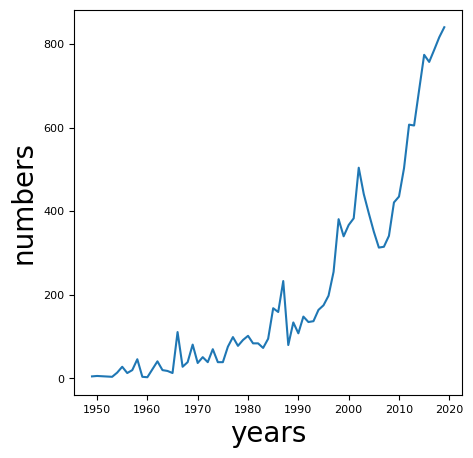

In [14]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel(xlabel="years",fontsize=20)
plt.ylabel(ylabel='numbers',fontsize=20)
plt.plot(grouping.index[:-2],grouping.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [15]:
unique_theme = sets.groupby('year').agg({'theme_id':pd.Series.nunique})
unique_theme.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

/tmp/ipykernel_4288/1821459115.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(unique_theme.index[:-2],unique_theme.theme_id[:-2])


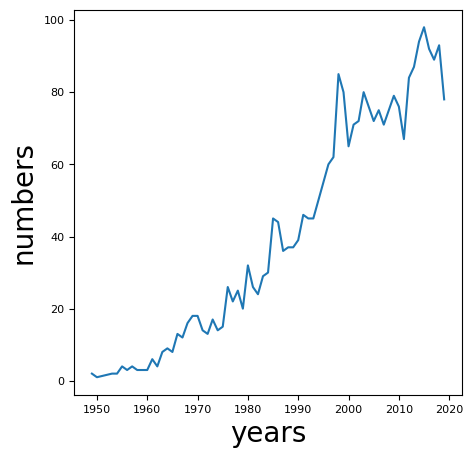

In [16]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel(xlabel="years",fontsize=20)
plt.ylabel(ylabel='numbers',fontsize=20)
plt.plot(unique_theme.index[:-2],unique_theme.theme_id[:-2])

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [17]:
avg_group = sets.groupby('year').agg({'num_parts':pd.Series.mean})
avg_group.rename(columns={'num_parts': 'Avg_numparts'},inplace=True)
avg_group

,Avg_numparts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

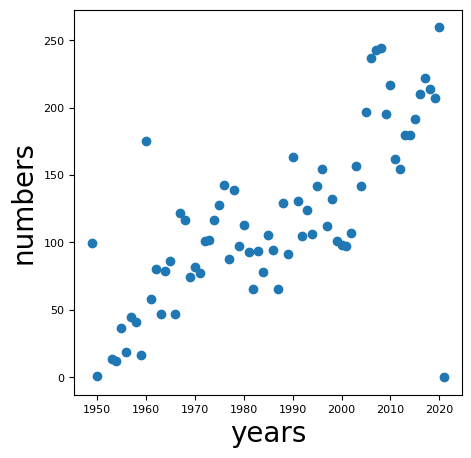

In [18]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel(xlabel="years",fontsize=20)
plt.ylabel(ylabel='numbers',fontsize=20)
plt.scatter(avg_group.index,avg_group.Avg_numparts)

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [19]:
highest_theme = sets['theme_id'].value_counts()
highest_theme

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src = "https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [20]:
new_themes = pd.read_csv("data/themes.csv")
new_themes.fillna(0)

,id,name,parent_id
0,1,Technic,0.0
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [21]:
new_themes[new_themes.name == 'Iron Man']

,id,name,parent_id
591,705,Iron Man,696.0


### linking it up to the data sets 

In [22]:
sets[sets.theme_id == 705]

,set_num,name,year,theme_id,num_parts
2931,30167-1,Iron Man vs. Fighting Drone,2013,705,24
2932,30168-1,Gun Mounting System,2013,705,17
8466,6250093-1,Iron Man Mosaic,2018,705,2305
11488,76006-1,Iron Man: Extremis Sea Port Battle,2013,705,195
11489,76007-1,Iron Man: Malibu Mansion Attack,2013,705,363
11490,76008-1,Iron Man vs. The Mandarin: Ultimate Showdown,2013,705,91
11651,76165-1,Iron Man Helmet,2020,705,479
15643,TRUIRONMAN-1,Iron Man Mosaic,2018,705,59


In [23]:
new_themes[new_themes.name == 'Competition']

,id,name,parent_id
2,3,Competition,1.0


In [24]:
sets[sets.theme_id == 3]

,set_num,name,year,theme_id,num_parts
2668,2854-1,Bungee Chopper,1998,3,71
3133,3038-1,Spider Slayer,1998,3,368
12311,8202-1,Blast Off Chopper with Bungee Cord Power!,1998,3,70
12343,8233-1,MC vs. Stinger,1998,3,118
12348,8239-1,Cyber Challenge,1998,3,121
12350,8241-1,Battle Cars,2001,3,110
12353,8245-1,Robot's Revenge,1998,3,222
12363,8257-1,Cyber Strikers,1998,3,367
12372,8266-1,Spyder Slayer,1998,3,368
12373,8268-1,Scorpion Attack,1999,3,79


### Merging (i.e., Combining) DataFrames based on a Key


In [25]:
combine = pd.DataFrame({'id':highest_theme.index,'set_Count':sets['theme_id'].value_counts()})
combine.head()

,id,set_Count
158,158,753
501,501,656
494,494,398
435,435,356
503,503,329


### using the merge function to combine data sets

To .merge() two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set on='id'. Both our set_theme_count and our themes DataFrames have a column with this name.



In [28]:
merge_data = pd.merge(new_themes,combine,on='id')
merge_data[:3]

,id,name,parent_id,set_Count
0,1,Technic,NaN,167
1,2,Arctic Technic,1.0,4
2,3,Competition,1.0,18
